Linear Regression with DF4 data

In [20]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
# import requests
import sqlite3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import make_regression
from scipy.stats import norm
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error


In [21]:

dbName = "rest_server/medisch_centrum_randstad/db.sqlite3"
tableName = "rest_api_netlify"
url = "http://localhost:8080/medish_centrum_randstad/api/netlify?page=1"
csvFile = "rest_server_new/medisch_centrum_randstad/data/data.csv"

In [22]:
#dbConnection = sqlite3.connect(dbName)
#dfFromDB = pd.read_sql_query(f"SELECT * FROM {'rest_api_netlify'}", dbConnection)
# sql adds index, remove:
#df = dfFromDB.drop('id', axis=1)
#pd.set_option('display.max_columns', 10)
# print(df.head())

In [23]:
df = pd.read_csv(r"C:\Users\jiyoo\workspace\project1\broncode\build\df4.csv", index_col = 0)
df.head()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.1
1,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.6
2,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.4
4,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.6


In [24]:
# remove negative values
df = df[(df >= 0).any(axis=1)]

In [25]:
df = df.drop_duplicates()

In [26]:
# convert non numeric to NaN
df = df.apply(lambda y: pd.to_numeric(y, errors='coerce') if y.dtype == 'object' else y)
df = df.apply(lambda y: pd.astype('float64') if y.dtype == 'object' else y)

In [27]:
df = df.dropna()

In [28]:
df.describe()

,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,bmi
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000
mean,82.038823,184.045512,91.708801,2.404249,9.780639,2.269776,79.988358,6.484461,27.419437
std,7.087155,12.515009,25.246900,1.170096,6.910443,1.803397,7.453324,2.707867,8.306686
min,64.000000,154.000000,50.000000,0.100000,0.000000,0.000000,59.700000,0.700000,11.300000
25%,77.600000,175.000000,71.300000,1.500000,3.300000,0.600000,75.000000,4.400000,20.900000
50%,81.700000,184.000000,89.000000,2.200000,9.500000,1.700000,79.600000,6.300000,26.400000
75%,86.500000,193.000000,110.000000,3.200000,15.800000,4.000000,84.900000,8.400000,33.000000
max,100.300000,214.000000,163.600000,5.500000,22.200000,6.000000,100.400000,13.800000,51.500000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3977 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   3977 non-null   float64
 1   length    3977 non-null   float64
 2   mass      3977 non-null   float64
 3   exercise  3977 non-null   float64
 4   smoking   3977 non-null   float64
 5   alcohol   3977 non-null   float64
 6   lifespan  3977 non-null   float64
 7   sugar     3977 non-null   float64
 8   bmi       3977 non-null   float64
dtypes: float64(9)
memory usage: 310.7 KB


We used same model with data using our pipeline_data_model_production to test the LinearRegression. We have tested various methods and choose the DF4 since DF4 has the highst score in R² and RMSE.

Experiment #	NaN drop	Dupli drop	Neg drop	object -> float	BMI feature	IQR-clip	IQR-drop
DF1	x	x	x	x	 	 	                                                                          
DF2	x	x	x	x	x	 	 
DF3	x	x	x	x	x	x	 
DF4	x	x	x	x	x	 	x

Jiyoon	
     R^2	    RMSE
DF1  0.9799	   1.1135
DF2  0.9812	   1.0783
DF3  0.9735	   1.2013
DF4  0.9812	   1.0783
DF4  0.9820       1.0252   IQR-drop

In [30]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']]
y = train.lifespan

regr = LinearRegression()
regr.fit(X, y) 

score = regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}) vanilla:', score)
a1=score

coefficient of determination(R²) vanilla: 0.9820618333051058


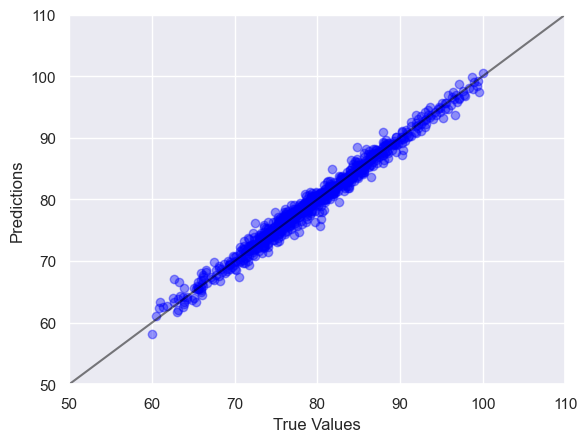

In [31]:
p_test = regr.predict(test.drop(columns=['lifespan']))

plt.scatter(test['lifespan'],p_test,c='blue', alpha=0.4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# plot diagonal line for comparison (prediction is exact)
lims=[50,110]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,c='black',alpha=0.5)
plt.show()

In [13]:
p_test

array([ 99.79816581,  79.18660952,  62.52990169,  82.15638199,
        86.34418901,  88.88551312,  79.13644387,  84.94703103,
        77.84541373,  78.2765994 ,  79.648698  ,  82.68631139,
        79.16246328,  75.27808245,  74.42186017,  77.30500627,
        75.76539022,  74.62047016,  86.25984253,  69.04157932,
        83.2592166 ,  93.7703274 ,  82.61841496,  86.63240367,
        79.54513293,  77.87173419, 100.5406868 ,  89.01249149,
        71.73398774,  84.21896403,  86.07102487,  87.24908772,
        82.98920894,  89.08071058,  85.23172051,  97.55307924,
        75.79663538,  76.48848072,  79.10115595,  74.94013232,
        89.06116914,  81.46276601,  74.31191004,  77.24699176,
        61.98853983,  62.46652523,  89.22524526,  78.46766566,
        77.9040269 ,  69.55967292,  88.09328732,  80.30714064,
        87.39052014,  73.90896464,  76.02235816,  62.65450418,
        78.46853135,  75.5500521 ,  75.4811978 ,  79.93034677,
        65.52285757,  83.53208135,  72.45904183,  70.23

In [14]:
print('Mean Absolute Error:', mean_absolute_error( test['lifespan'], p_test))
print('Mean Squared Error:', mean_squared_error(test['lifespan'], p_test))
import math
print('Mean Root Squared Error:', math.sqrt(mean_squared_error(test['lifespan'], p_test)))

Mean Absolute Error: 0.7632040181701046
Mean Squared Error: 1.0510579968056664
Mean Root Squared Error: 1.0252111961960162


If Mean Root Squard Error score is lower, it is more reliable.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

A prediction from the Random Forest Regressor is an average of the predictions produced by the trees in the forest.

In [16]:
rng_forest_regr = RandomForestRegressor(n_estimators=100)
rng_forest_regr.fit(X,y)

RandomForestRegressor()

In [17]:
rng_forest_score = rng_forest_regr.score(test[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']],test.lifespan)
print(f'coefficient of determination(R\N{SUPERSCRIPT TWO}):', rng_forest_score)

coefficient of determination(R²): 0.9750935717854575


Scatter plot with regression line. The relation between bmi & mass and between lifespan & genetic is high. This is logical. BMI made by weight. 
However the data is not very realistic. 

In [18]:
X = train[['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar','bmi']]
y = train.lifespan

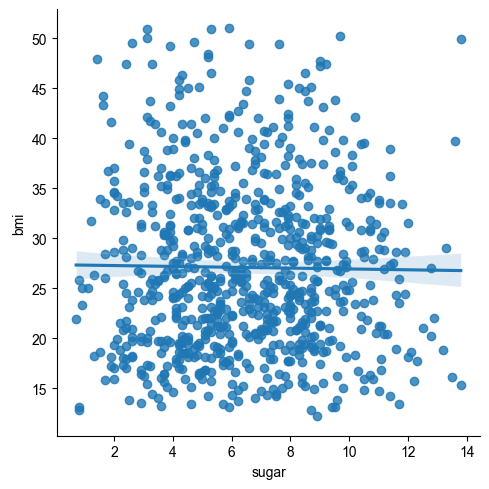

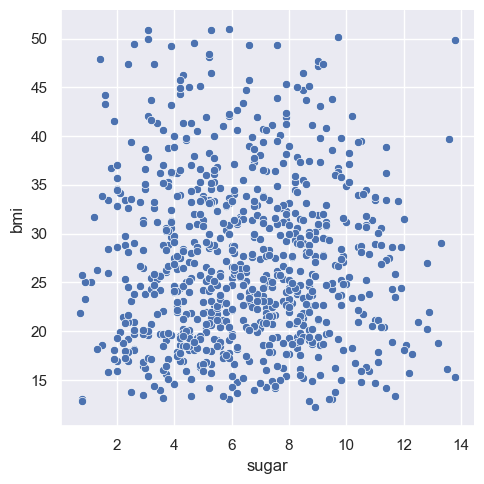

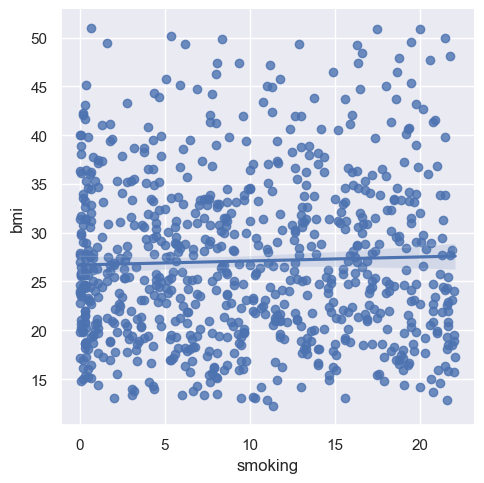

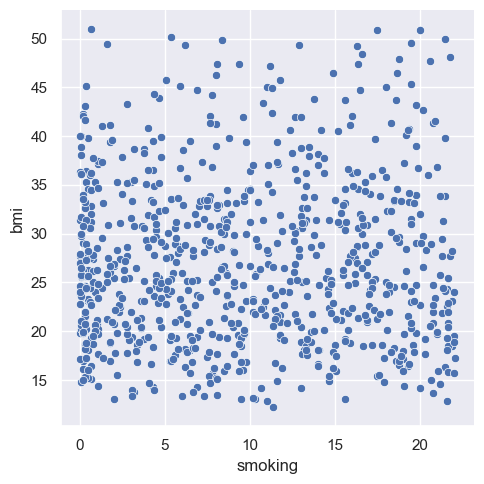

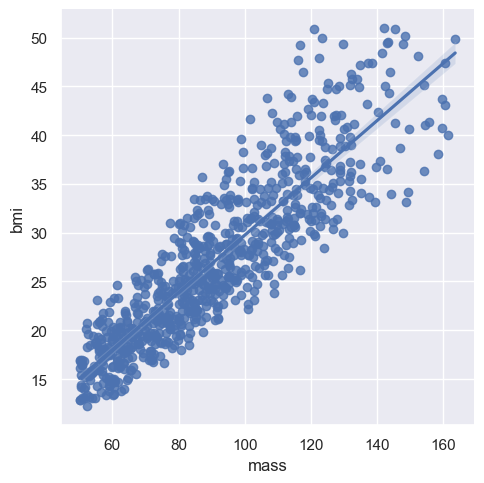

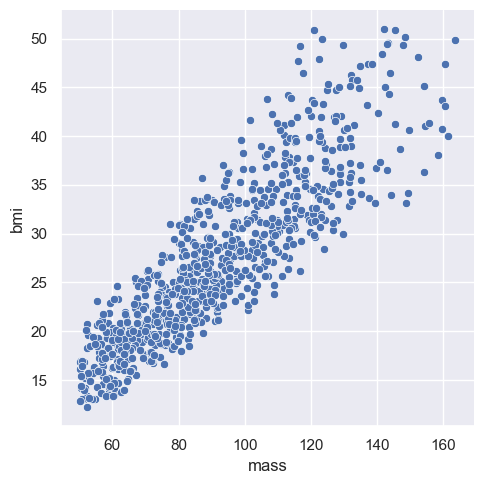

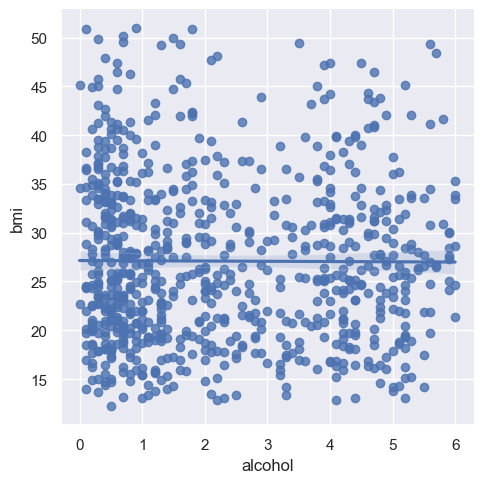

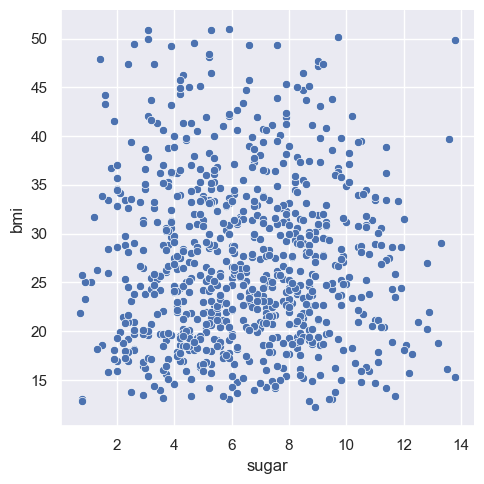

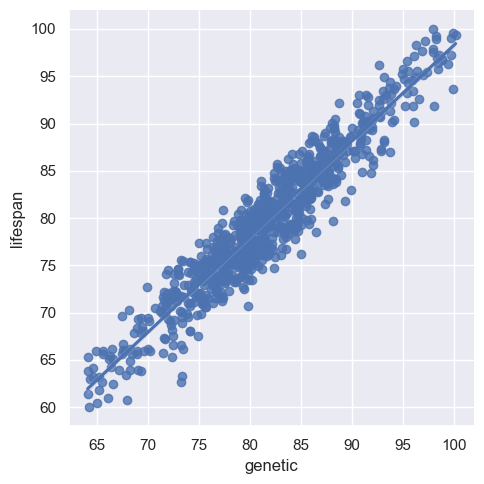

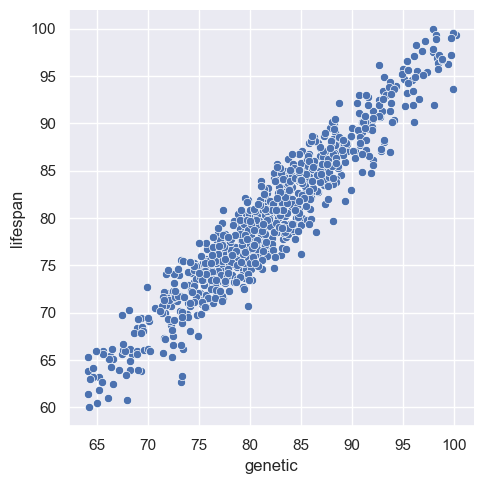

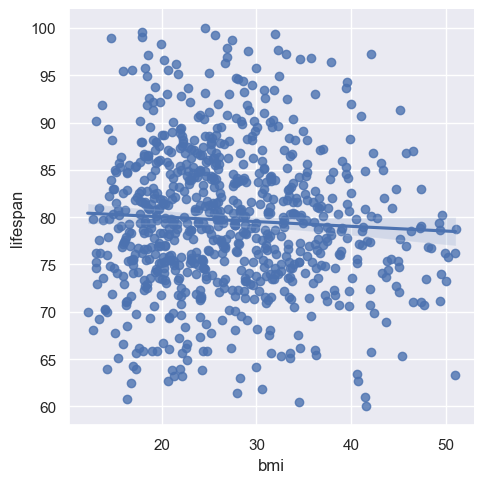

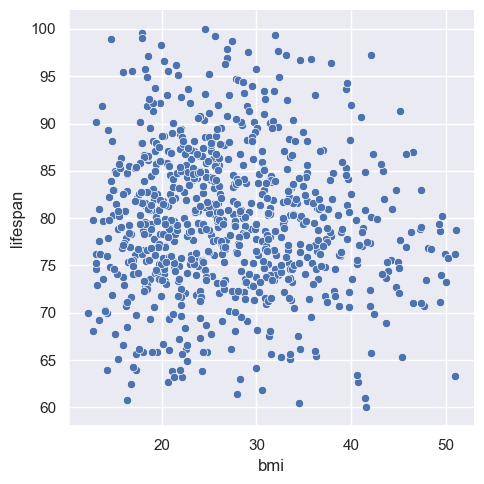

In [19]:
sns.lmplot(x="sugar", y="bmi", data=test);
sns.set(style='darkgrid')
sns.relplot(x='sugar', y='bmi', data=test)

sns.lmplot(x="smoking", y="bmi", data=test);
sns.set(style='darkgrid')
sns.relplot(x='smoking', y='bmi', data=test)

sns.lmplot(x="mass", y="bmi", data=test);
sns.set(style='darkgrid')
sns.relplot(x='mass', y='bmi', data=test)

sns.lmplot(x="alcohol", y="bmi", data=test);
sns.set(style='darkgrid')
sns.relplot(x='sugar', y='bmi', data=test)

sns.lmplot(x="genetic", y="lifespan", data=test);
sns.set(style='darkgrid')
sns.relplot(x='genetic', y='lifespan', data=test)

sns.lmplot(x="bmi", y="lifespan", data=test);
sns.set(style='darkgrid')
sns.relplot(x='bmi', y='lifespan', data=test)